<a href="https://colab.research.google.com/github/Nicolaser1102/predicciones_ventas_comida/blob/main/Predicciones_venta_comida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CODING DOJO
Fecha creación:15/1/2022

Fecha de actualización: 29/1/2022

Esteban Simbaña

Proyecto 1 - Coding Dojo

In [391]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [459]:
import numpy as np

In [392]:
import pandas as pd

nombrearchivo = '/content/drive/MyDrive/Coding Dojo/Códigos/Solutions/data_sales/sales_predictions.csv'
sales_predictions_df = pd.read_csv(nombrearchivo)
sales_predictions_df1 = sales_predictions_df
sales_predictions_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


Como inicio, se muestran los tipos de datos para su análisis 

In [393]:
sales_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB




*   Como se puede observar los datos en total recogidos serían de "8523" de los cuales en la columna de ('Item_Weight' , 'Outlet_Size') se encuentran datos faltantes 

*   Por otro lado, también podemos asegurar que cada tipo de variables corresponde lógicamente con los datos presentados en la sales_datadf



#  Datos faltantes 
Ahora se analiza los datos faltantes

In [394]:
sales_predictions_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Ahora se analiza que porcentaje de datos faltantes hay respectivamente 

Porcentaje datos faltantes de 'Item_Weight'

In [395]:
item_weight_missing = pd.isnull(sales_predictions_df['Item_Weight']).sum()
item_weight_missing #se guarda en una variable el total de datos faltantes 

1463

Se dividen para el total de datos y se multiplican por "100"

In [396]:
count_iw = sales_predictions_df['Item_Weight'].count()
count_iw
#como la funcion cuenta solo los datos que tienen valor
#sumamos los datos para tener el total de datos

7060

In [397]:
total_item_weight = item_weight_missing +  count_iw
total_item_weight

8523

In [398]:

#ahora si realizamos la conversion a porcentaje
prcent_iw_missing = (item_weight_missing/total_item_weight)*100
prcent_iw_missing #17.16 es el porcentaje de valores faltantes en la columna 'Item_Weight'

17.165317376510618

Porcentaje datos faltantes en 'Outlet_Size'

In [399]:
#ahora utilizaremos un método más automatizado para mostrar el porcentaje de datos de 'Outlet_Size'
sales_predictions_df['Outlet_Size'].isna().sum()/len(sales_predictions_df)*100
#nos muestra en pantalla el porcentaje total

28.27642848762173

In [400]:
#Mostramos todos los datos faltantes en porcentaje
sales_predictions_df.isna().sum()/len(sales_predictions_df)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


*   Observamos que la variable 'Outlet_Size' tiene un 28% de datos faltantes por lo que se debería considerar eliminar la variable si no es prioritaria 
*  Mientras tanto, la variable 'Item_Weight' se podría inferir un dato para imputarlo a los datos faltantes.




# Datos estadísticos 

In [401]:
#mostramos los datos estadísticos de la df
sales_predictions_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800




1.   Se observa que la variable 'Item Weight' (la variable que tiene datos faltantes que podrían ser modificados) no esta tan dispersa con una variación estándar "std" de 4,64 
2.   La variable 'Oulet_Size' no se muestra por ser una variable categórica 
3. Se nota que hay una gran variación entre los datos de 'Item_Oulet_Sales' pero no hay gran problema porque tiene sentido su variación ya que pueden haber productos que se vendieron más o menos, debido a su popularidad, necesidad del cliente,etc.


# Rellenar datos faltantes 

Como se mostró anteriormente se puede modificar los datos faltantes de la variable 'Item_Weight'
Ya que es una variable de tipo númerica se puede optar por reemplazar los datos por el promedio "mean" de la variable.

In [402]:
#mostramos en una variable el promedio de la columna 'Item_Weight'
mean_Item_Weight = sales_predictions_df1['Item_Weight'].mean()
mean_Item_Weight

12.857645184136183

In [403]:
#ahora reemplazamos en sales_prediction_df1
sales_predictions_df1['Item_Weight'] = sales_predictions_df1['Item_Weight'].fillna(mean_Item_Weight)
sales_predictions_df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [404]:
#verificamos los datos faltantes
sales_predictions_df1.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Eliminar datos faltantes


Eliminamos las filas con variables faltantes en la columna de 'Oulet_Size'

In [405]:
sales_predictions_df1 = sales_predictions_df1.dropna(subset=['Outlet_Size'])
sales_predictions_df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


- Se encuentra que las clasificaciones están innecesariamente clasificadas en 5 tipos, ya que podría reducirse a solo 2 clasificaciones (Low Fat Y Regular)

*   Las comidas referentes a "Low Fat", "low fat" y "LF"; las podemos incluir en una sola clasificación

      * Tomamos en cuenta a "LF" como "Low Fat" porque es una abreviatura de la misma. 
      

*   Las comidas referentes a "Regular" y "reg" se pueden unir para crear una sola clasificación 
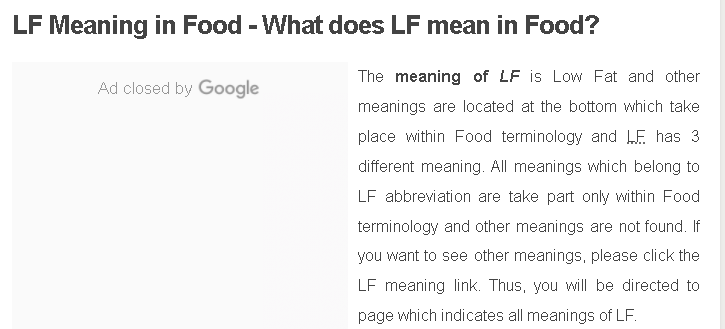

Link: https://acronym24.com/lf-meaning-in-food/


In [406]:
#reemplazamos los valores en la df principal
sales_predictions_df1['Item_Fat_Content'] =sales_predictions_df1['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [407]:
sales_predictions_df1['Item_Fat_Content'] = sales_predictions_df1['Item_Fat_Content'].replace('reg','Regular')
sales_predictions_df1.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8517,FDF53,20.750,Regular,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


# Base de datos final 


Aplicados los cambios se mostraría la df final, teniendo en cuenta que con la poca información del negocio no podríamos borrar ninguna columna del todo ya que no conocemos a profundidad la base de datos

In [408]:
#base de datos final (aplicado un data_cleaning)

In [409]:
sales_predictions_df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,Regular,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# **Visualización de datos** 



In [390]:
#mostramos la df con la que vamos a trabajar 
sales_predictions_df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## Gráfico 1

In [ ]:
#importamos librerías para la visualiación de datos
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#se ve la diferente información que nos muestra la tabla 
sales_predictions_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6113 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6113 non-null   object 
 1   Item_Weight                6113 non-null   float64
 2   Item_Fat_Content           6113 non-null   object 
 3   Item_Visibility            6113 non-null   float64
 4   Item_Type                  6113 non-null   object 
 5   Item_MRP                   6113 non-null   float64
 6   Outlet_Identifier          6113 non-null   object 
 7   Outlet_Establishment_Year  6113 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       6113 non-null   object 
 10  Outlet_Type                6113 non-null   object 
 11  Item_Outlet_Sales          6113 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 620.9+ KB


In [ ]:
#suma de todas las ventas por supermercado 
grafico1 =sales_predictions_df1.groupby('Outlet_Type')['Item_Outlet_Sales'].mean()
grafico1 

Outlet_Type
Grocery Store         340.329723
Supermarket Type1    2340.986430
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
#Valores eje_y
grafico1_ejey =list(grafico1.values)
grafico1_ejey

[340.3297227272727, 2340.9864298764105, 1995.498739224138, 3694.0385576470585]

In [ ]:
#valores eje x
grafico1_ejex = list(grafico1.keys())  
grafico1_ejex

['Grocery Store',
 'Supermarket Type1',
 'Supermarket Type2',
 'Supermarket Type3']

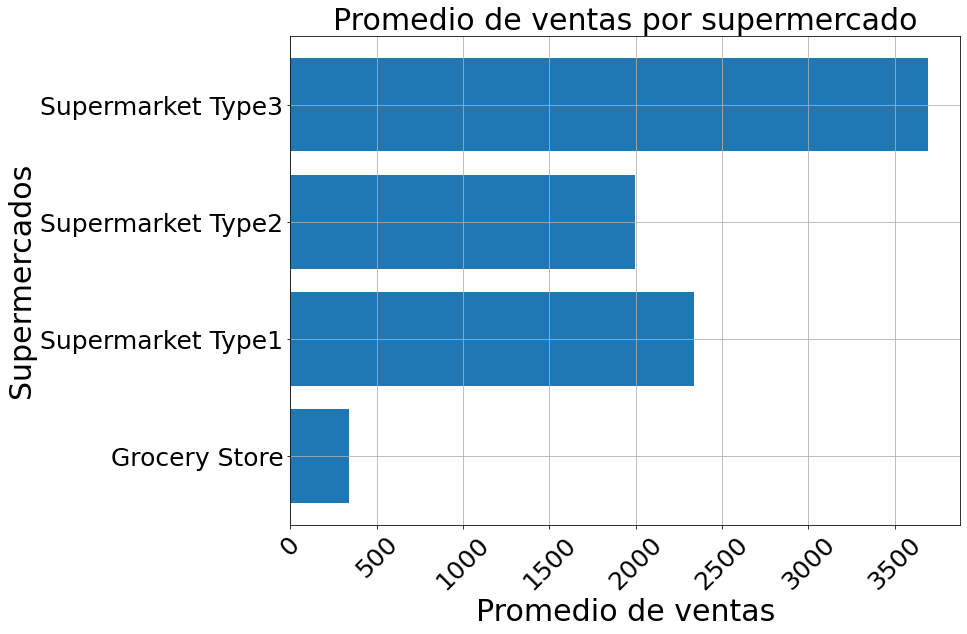

In [ ]:
#definiendo los ejes x y y porcedemos a realizar un grafico de barras que nos muestre que 
#supermercado vende más 

#creamos gráfica
plt.figure(figsize=(12,9))
plt.barh (grafico1_ejex,grafico1_ejey);
plt.ylabel('Supermercados', fontsize=30)
plt.xlabel('Promedio de ventas', fontsize=30)
plt.title('Promedio de ventas por supermercado',fontsize=30)
plt.xticks(rotation=45,fontsize = 25)
plt.yticks(fontsize=25)
plt.grid()
plt.show()



**Conclusión**
- El gráfico muestra que hay más ventas en el Supermercado N°3 mientras que el que menos ventas tiene es el Grocery Store  
- Los Supermercados N°1 y N°2 tienen un número de ventas similar

## Gráfico 2

In [ ]:
#vemos otros datos de la tabla
sales_predictions_df1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000
mean,12.888856,0.064505,141.256859,1995.794373,2322.688445
std,4.073798,0.050092,62.229701,8.842615,1741.592093
min,4.555000,0.000000,31.290000,1985.000000,33.955800
25%,9.800000,0.026681,94.012000,1987.000000,974.731200
50%,12.857645,0.052811,143.178600,1997.000000,1928.156800
75%,15.700000,0.092834,185.892400,2004.000000,3271.075400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


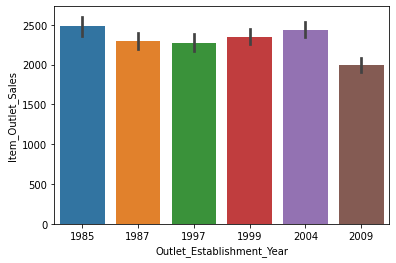

In [ ]:
#realizamos la grafica con el objetivo de obtener 'ventas en relacion con el años de funcionamiento'
sns.barplot(x="Outlet_Establishment_Year", y="Item_Outlet_Sales", data=sales_predictions_df1);

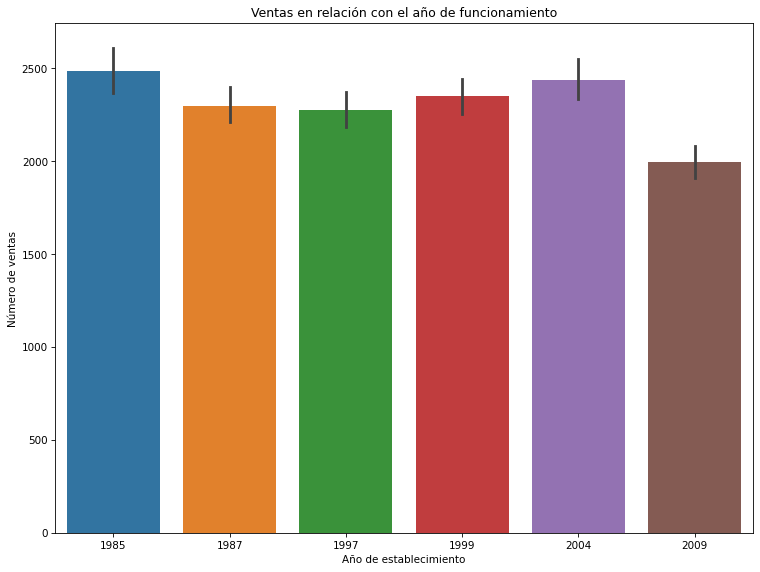

In [ ]:

plt.figure(figsize=(12,9),dpi = 75)
a = sns.barplot(x="Outlet_Establishment_Year", y="Item_Outlet_Sales", data=sales_predictions_df1);
#Realizaremos algunos ajustes
a.set_title('Ventas en relación con el año de funcionamiento')
a.set_xlabel('Año de establecimiento')
a.set_ylabel('Número de ventas')
pass

**Conclusión**
- En el año 2009 se pueden ver reducidas las ventas por lo que se deberían encontrar causas del porque ocurre este descenso y aplicar estrategias para subir las ventas.

##Gráfico 3 


In [ ]:
#conocemos los datos de cuanto es el promedio de ventas por tipo de producto
grafico3 =sales_predictions_df1.groupby('Item_Type')['Item_Outlet_Sales'].mean()
grafico3

Item_Type
Baking Goods             2066.375730
Breads                   2407.302188
Breakfast                2303.524727
Canned                   2303.547845
Dairy                    2352.180121
Frozen Foods             2262.479339
Fruits and Vegetables    2434.420413
Hard Drinks              2310.942315
Health and Hygiene       2186.035472
Household                2442.158504
Meat                     2348.076214
Others                   1989.491595
Seafood                  2433.918743
Snack Foods              2427.803649
Soft Drinks              2086.753774
Starchy Foods            2537.401846
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
#datos para el eje y
grafico3_ejey = list(grafico3.values)
grafico3_ejey

[2066.375729589633,
 2407.302187709497,
 2303.5247265822786,
 2303.5478450106157,
 2352.180120967742,
 2262.479338536585,
 2434.420412910532,
 2310.9423148648652,
 2186.035471934605,
 2442.158503543914,
 2348.076213592233,
 1989.4915951219511,
 2433.9187434782607,
 2427.8036486175115,
 2086.7537743589746,
 2537.4018457142856]

In [ ]:
#datos para el eje x
grafico3_ejex = list(grafico3.keys())
grafico3_ejex

['Baking Goods',
 'Breads',
 'Breakfast',
 'Canned',
 'Dairy',
 'Frozen Foods',
 'Fruits and Vegetables',
 'Hard Drinks',
 'Health and Hygiene',
 'Household',
 'Meat',
 'Others',
 'Seafood',
 'Snack Foods',
 'Soft Drinks',
 'Starchy Foods']

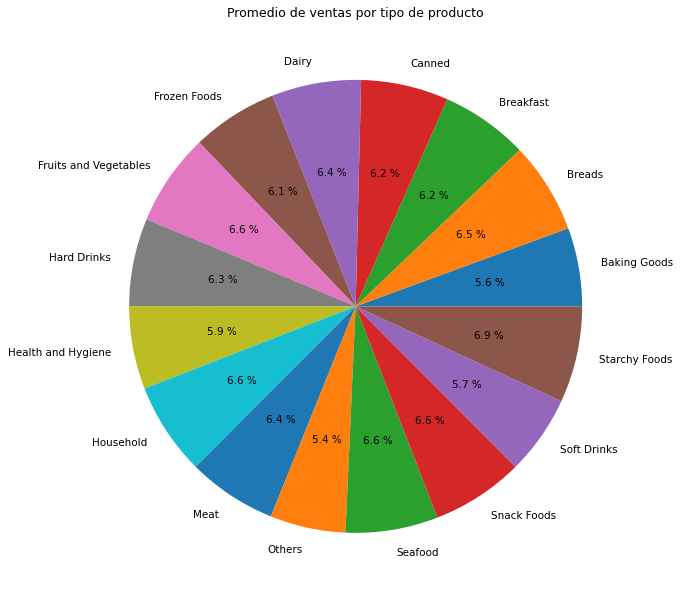

In [ ]:
#realizamos la figura
figura = plt.figure(figsize=(13,10),dpi = 75)
ax = figura.gca()
plt.pie(grafico3_ejey, labels=grafico3_ejex,autopct="%0.1f %%")
ax.set_title('Promedio de ventas por tipo de producto')


pass

**Conlusión** 
- Se observa en la gráfica que no hay variación respecto al porcentaje con que los productos se venden en las diferentes tiendas, infiriendo que todos los productos tienen su respectivo protagonismo al ser elegidos por los usuarios

# Grafico 4 (Productos únicos por supermercado vs promedio de ventas)

In [ ]:
datos_grafico4 = sales_predictions_df1.groupby('Outlet_Type')['Item_Identifier'].nunique()
datos_grafico4

Outlet_Type
Grocery Store         528
Supermarket Type1    1514
Supermarket Type2     928
Supermarket Type3     935
Name: Item_Identifier, dtype: int64

In [ ]:
grafico_4_ejey =list(datos_grafico4.values)
grafico_4_ejex = list(datos_grafico4.keys())  

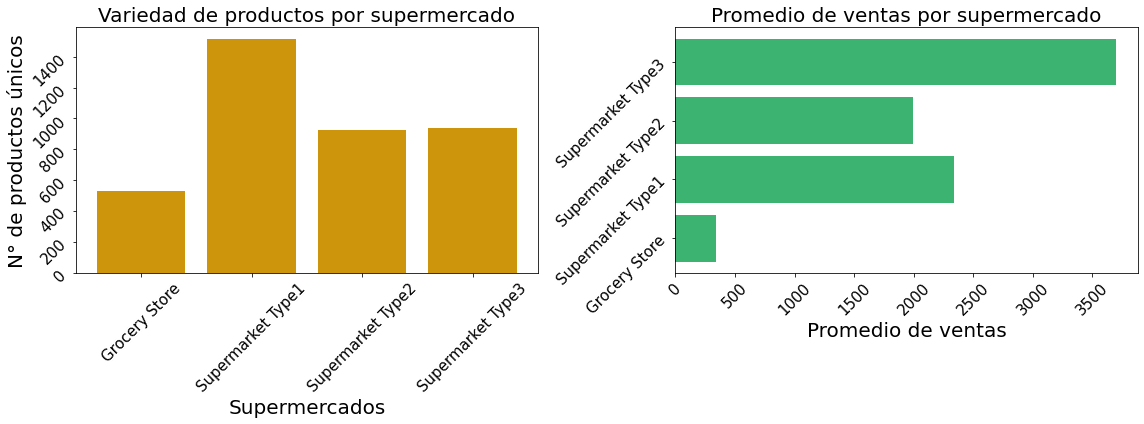

In [ ]:
fig4 = plt.figure (figsize=(16,6))

ax1 = fig4.add_subplot(1,2,1)
ax2= fig4.add_subplot(1,2,2)

#confirguramos gráfico 1
ax1.bar(grafico_4_ejex, grafico_4_ejey, color= 	'#CD950C')
ax1.set_ylabel('N° de productos únicos', fontsize=20)
ax1.set_xlabel('Supermercados', fontsize=20)
ax1.set_title('Variedad de productos por supermercado',fontsize=20)
ax1.tick_params( labelsize=15, rotation=45)
#configuramos grafico 2
ax2.barh(grafico1_ejex,grafico1_ejey,color='#3CB371')
plt.xlabel('Promedio de ventas', fontsize=20)
plt.title('Promedio de ventas por supermercado',fontsize=20)
plt.xticks(rotation=45,fontsize = 15)
plt.yticks(rotation=45,fontsize=15)

fig4.tight_layout()


pass

- Comparando tenemos en cuenta que la variedad de productos es mayor en el supermercado tipo 1 pero el mismo no tiene un número superior de ventas
- Se debería reconsiderar la variabilidad de productos del Supermercado Tipo 3 porque es el establecimiento que más vende pero no tiene una suficiente variabilidad.

# Visualización de datos (Histogramas y diagramas de caja)

In [ ]:
#revisamos que tipos de datos tenemos en la df
sales_predictions_df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


##Histogramas 

- Histograma de acuerdo a la distribución de la columna 'Item_Fat content' (Contenido de grasa del artículo)

In [ ]:
#filtramos la columna con la que queremos realizar el histograma
datos_hist1 = sales_predictions_df1.loc[:,'Item_Fat_Content']

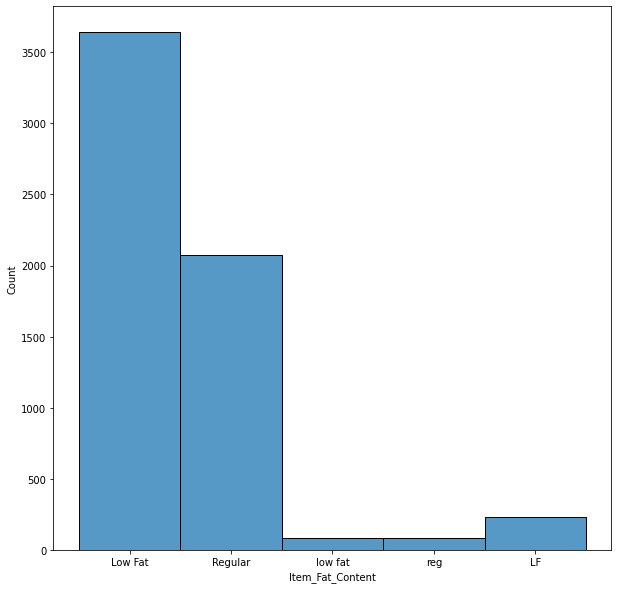

In [ ]:
#creamos el primer histograma

histograma_1 = plt.figure(figsize= (10,10))
ax.figure.gca()
sns.histplot(datos_hist1)
pass

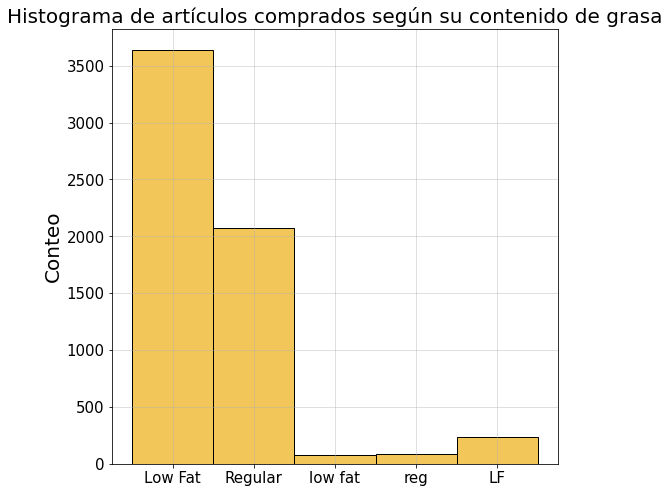

In [ ]:
#mejoramos el gráfico

histograma_1 = plt.figure(figsize= (8,8))
ax.figure.gca()
sns.histplot(datos_hist1,color = '#EEB422')

plt.xlabel('') 
plt.ylabel('Conteo',fontsize=20)
plt.title('Histograma de artículos comprados según su contenido de grasa',fontsize = 20)

plt.xticks(fontsize=15)
plt.yticks(fontsize= 15)
plt.grid(alpha= 0.5)
pass

- El gráfico nos indica que los usuarios compran el doble de artículos bajos en contenidos de grasa respecto a los artículos regulares.

- Histogramaa de acuerdo a la distribución de la columna 'Item_Fat content' (Contenido de grasa del artículo)

In [ ]:
#filtramos la columna con la que queremos realizar el histograma
datos_hist2 = sales_predictions_df1.loc[:,'Item_Type']

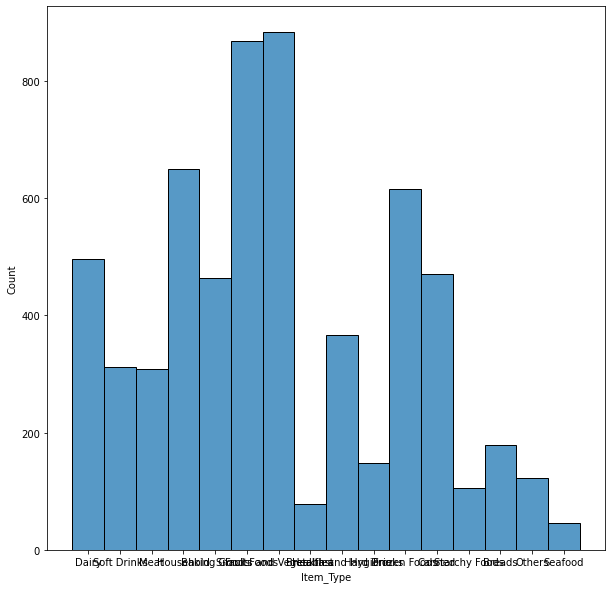

In [ ]:
#creamos el segundo histograma
histograma_2 = plt.figure(figsize= (10,10))
ax.figure.gca()
sns.histplot(datos_hist2)

pass

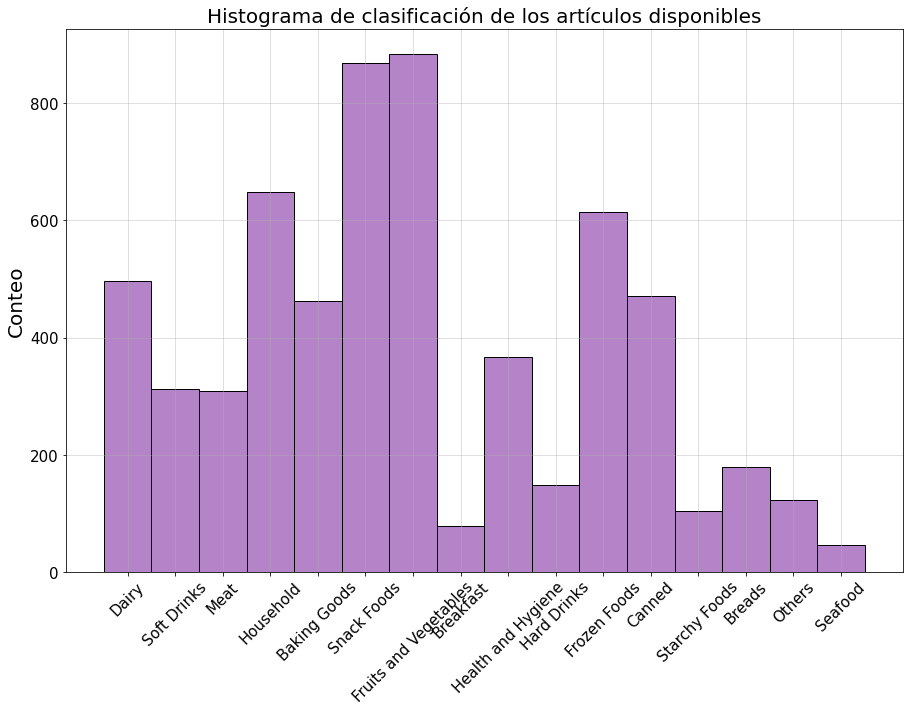

In [ ]:

#mejoramos el gráfico 
histograma_2 = plt.figure(figsize= (15,10))
ax.figure.gca()
sns.histplot(datos_hist2, color= '#9b59b6')

plt.xticks(rotation=45,fontsize= 15)
plt.yticks(fontsize= 15)

plt.xlabel('') 
plt.ylabel('Conteo',fontsize=20)
plt.title('Histograma de clasificación de los artículos disponibles',fontsize = 20)
plt.grid(alpha= 0.5)

pass

- Se puede notar que hay una gran variedad de artículos de tipo de "Snacks" y "Frutas y Vegetales",por lo que se puede deducir que es lo que caracteriza a la red de supermercados vender.
- Por su contra parte los artículos 'Mariscos' no tienen una gran variedad pero en conjunto con diagramas anteriores, es correcto ya que tienen un mismo promedio de ventas en relación con otros productos.
- Cada supermercado debe tener un control en relación a cual artículo es el más vendido dentro las categorías que tienen más variedad ya que de ahí podrían prevenir el mayor número de perdidas en especial dentro dela categoría 'Frutas y Vegetales' porque son productos perecibles. 

- Diagrama de caja sobre ventas en cada tipo de supermercado

In [ ]:
#se filtra cada uno de los datos de los supermercados

#Datos para supermarket type 1
filtro_supermercado_type1 = sales_predictions_df1.loc[(sales_predictions_df1['Outlet_Type']=='Supermarket Type1'),:]
#ahora se convierte en lista el numero de ventas
datosv_filtro_supermercado_type1 =  filtro_supermercado_type1['Item_Outlet_Sales'].tolist()


In [ ]:
#Datos para supermarket type 2
filtro_supermercado_type2 = sales_predictions_df1.loc[(sales_predictions_df1['Outlet_Type']=='Supermarket Type2'),:]
#ahora se convierte en lista el numero de ventas
datosv_filtro_supermercado_type2 =  filtro_supermercado_type2['Item_Outlet_Sales'].tolist()


In [ ]:
#Datos para supermarket type 3
filtro_supermercado_type3 = sales_predictions_df1.loc[(sales_predictions_df1['Outlet_Type']=='Supermarket Type3'),:]
#ahora se convierte en lista el numero de ventas
datosv_filtro_supermercado_type3 =  filtro_supermercado_type3['Item_Outlet_Sales'].tolist()

In [ ]:
#Datos para Grocery Store
filtro_grocery_store = sales_predictions_df1.loc[(sales_predictions_df1['Outlet_Type']=='Grocery Store'),:]
#ahora se convierte en lista el numero de ventas
datosv_filtro_grocery_store = filtro_grocery_store ['Item_Outlet_Sales'].tolist()


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


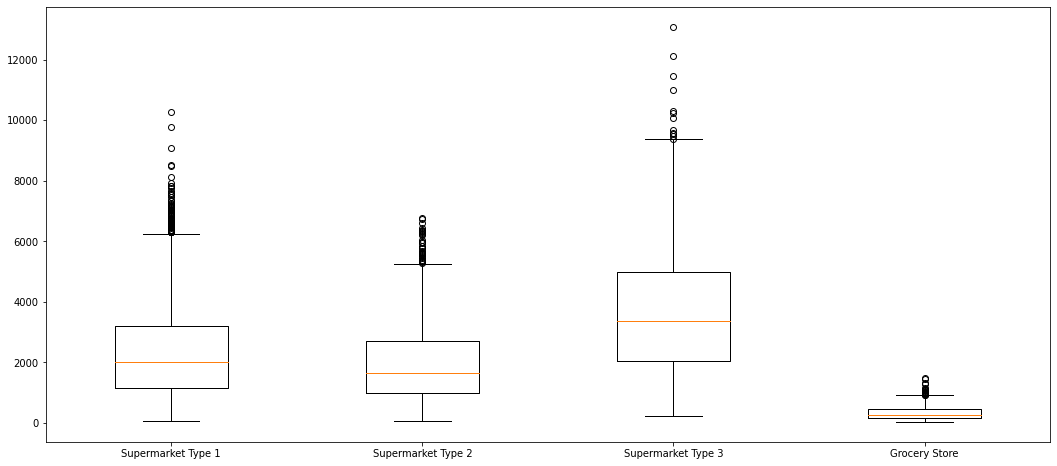

In [ ]:
plt.figure(figsize=(18,8))
plt.boxplot([datosv_filtro_supermercado_type1,datosv_filtro_supermercado_type2,datosv_filtro_supermercado_type3,datosv_filtro_grocery_store], labels=['Supermarket Type 1', 'Supermarket Type 2', 'Supermarket Type 3', 'Grocery Store']);

pass

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


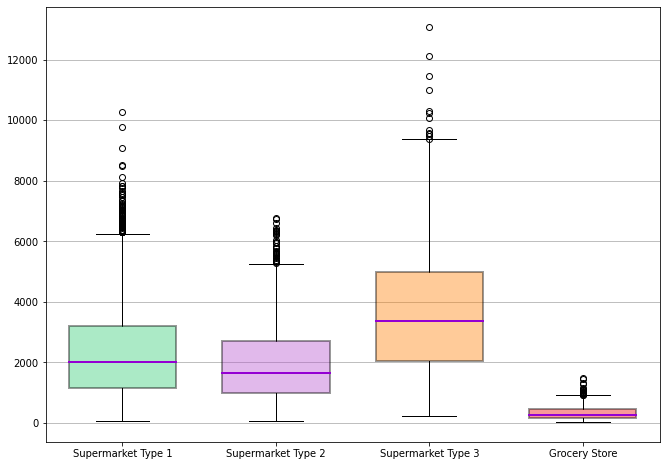

In [ ]:
#mejoramos el gráfico usando
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (11,8))
boxplots = axes.boxplot([datosv_filtro_supermercado_type1,datosv_filtro_supermercado_type2,datosv_filtro_supermercado_type3,datosv_filtro_grocery_store],
           labels=['Supermarket Type 1', 'Supermarket Type 2', 'Supermarket Type 3', 'Grocery Store'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='#9400D3'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = '#ED9121', alpha = .4)
          )
#cambiando color de boxplot 1
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('#2ecc71')

#cambiando color de boxplot 2
boxplot2 = boxplots['boxes'][1]
boxplot2.set_facecolor('#B452CD')

#cambiando color de boxplot 3
boxplot3 = boxplots['boxes'][2]
boxplot3.set_facecolor('#FF7F00')

#cambiando color de boxplot 4
boxplot4 = boxplots['boxes'][3]
boxplot4.set_facecolor('#EE0000')
plt.grid(axis='y')
pass


En este boxplot se puede reafirmar la conclusión de los gráficos anteriores respecto al número de ventas: 


1.   El supermercado tipo 3 es el que tiene mayor número de ventas y una mediana de ventas superior a las máximas de todos los otros supermercados.
2.   El supermercado tipo 1 y tipo 2 tienen un flujo de ventas iguales
3. La grocery store cuenta con el menor número de ventas



- Diagrama de caja para revisar el resumen estadístico de la variable 'Item_Weight

In [ ]:
#se convierte a lista la columna a la que vamos a realizar el boxplot
datos_item_weight = sales_predictions_df1['Item_Weight'].tolist()

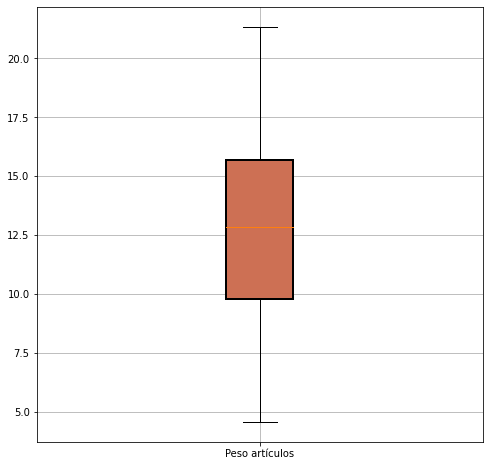

In [ ]:
plt.figure(figsize=(8,8))
plt.boxplot([datos_item_weight], labels=['Peso artículos'],patch_artist=True, boxprops = dict(facecolor = '#CD7054', linewidth=2, color='Black'));
plt.grid()

pass

En este boxplot se muestra como la mediana de productos pesan un poco más de 12.5 kilos, además de que ningún artículo sobrepasa los 20 kilos, pero tampoco llegan a pesar menos de 4 kilos; por lo que también se podría hacer un estudio  respecto a las preferencias de los clientes en solo comprar artículos unitarios para así, como estrategia, por ejemplo: los productos que esten empaquetados (sixpack, pack de 12 unidades,etc) podrían desempaquetarse para ser vendidos al cliente en unidades y que ya no vayan a la tienda por esos productos, sino tenga más en mente de comprar en los supermercados de nuestra cadena.

## Modelo regresión lineal

In [ ]:
#Data frame que usaremos
sales_predictions_df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


Primero, vemos que datos tienen variables categóricas y que datos variables continuas

In [326]:
sales_predictions_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6113 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6113 non-null   object 
 1   Item_Weight                6113 non-null   float64
 2   Item_Fat_Content           6113 non-null   object 
 3   Item_Visibility            6113 non-null   float64
 4   Item_Type                  6113 non-null   object 
 5   Item_MRP                   6113 non-null   float64
 6   Outlet_Identifier          6113 non-null   object 
 7   Outlet_Establishment_Year  6113 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       6113 non-null   object 
 10  Outlet_Type                6113 non-null   object 
 11  Item_Outlet_Sales          6113 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 620.9+ KB


In [327]:
#Como variables categóricas tenemos las columnas 

variables_c_df1 = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
variables_c_df1

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

 Elegimos estas columnas ya que las otras que son tipo objeto y no cuentan como características para los diferentes productos,ya que podrían surgir diversos problemas como:

- Nuestro modelo podrá predecir el 100% de los datos y solo podrá predecir a individuos (en este caso productos) con características específicas, y esto no funciona en la vida real.
  * Apoyando a la idea anterior, como otro motivo es que podemos tomar como analogía:
        - No porque te llames Juan vas a poder conseguir más ingresos.  ⬇️
        - No porque tengas un ID de producto especial o diferente vas a tener más ventas que otros productos.

Ahora para el algoritmo tendremos que cambiar las variables categóricas en variables "dummies" para que el algoritmo trabaje mejor

In [ ]:
#Primero vemos cuantos tipos de etiquetas tendrá cada variable
sales_predictions_df1['Item_Fat_Content'].unique()
#esta variable tiene 2 etiquetas (si se puede hacer un one hot encoding 'normal')

array(['Low Fat', 'Regular'], dtype=object)

In [ ]:
sales_predictions_df1['Item_Type'].unique() 
#esta variable tiene 16 variables ( se tendría que hacer un one hot encoding más compacto)

array(['Dairy', 'Soft Drinks', 'Meat', 'Household', 'Baking Goods',
       'Snack Foods', 'Fruits and Vegetables', 'Breakfast',
       'Health and Hygiene', 'Hard Drinks', 'Frozen Foods', 'Canned',
       'Starchy Foods', 'Breads', 'Others', 'Seafood'], dtype=object)

In [ ]:
sales_predictions_df1['Outlet_Size'].unique()
#esta variable tiene 3 etiquetas ( si se puede hacer un hot encoding 'normal')

array(['Medium', 'High', 'Small'], dtype=object)

In [ ]:
sales_predictions_df1['Outlet_Location_Type'].unique()
#esta variable tiene 3 etiquetas (si se pude hacer un hot encoding 'normal')

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [ ]:
sales_predictions_df1['Outlet_Type'].unique()
#esta variable tiene 4 etiquetas (si se puede hacer un hot encoding 'normal')

array(['Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3',
       'Grocery Store'], dtype=object)

Bien, ya sabemos a que columnas debemos aplicar que tipo de 'hot encoding'

### One Hot Encoding variable 'Item Fat content'

In [537]:
#importamos librerías que necesitaremos
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

Transformamos en variables numéricas

In [538]:
# transform and map Item_Fat_Content variable

sales_predictions_df_reg = sales_predictions_df1
sales_predictions_df_reg2 = sales_predictions_df_reg #sp_df_reg2 para aplicar los cambios

item_fat_le = LabelEncoder() #instanciamos la función

item_fat_labels = item_fat_le.fit_transform(sales_predictions_df_reg2['Item_Fat_Content'])
item_fat_labels

array([0, 1, 0, ..., 0, 1, 0])

In [539]:
sales_predictions_df_reg2.shape

(6113, 12)

In [540]:
sales_predictions_df_reg2['Item_Fat_Content'] = item_fat_labels
sales_predictions_df_reg2#logramos cambiarlo a variable numérica

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700
4,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052
5,FDP36,10.395,1,0.000000,Baking Goods,51.4008,OUT018,2009,1,2,2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,1,0.083607,Frozen Foods,178.8318,OUT046,1997,2,0,1,3608.6360
8518,FDF22,6.865,0,0.056783,Snack Foods,214.5218,OUT013,1987,0,2,1,2778.3834
8520,NCJ29,10.600,0,0.035186,Health and Hygiene,85.1224,OUT035,2004,2,1,1,1193.1136
8521,FDN46,7.210,1,0.145221,Snack Foods,103.1332,OUT018,2009,1,2,2,1845.5976


Aplicamos one hot encoding como último paso 

In [541]:
item_fat_ohe = OneHotEncoder()
if_feature_arr = item_fat_ohe.fit_transform(
                              sales_predictions_df_reg2[['Item_Fat_Content']]).toarray() #nos muestra un arreglo
if_feature_arr                                                                       #con los diferentes valores en '0' y '1'


array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [542]:
 #son los nombres que tendrá la de valores categóricos (ahora numéricos)
if_feature_labels = np.array(['IFC_Low_Fat', 'IFC_Regular'])

In [543]:
if_features = pd.DataFrame(if_feature_arr, 
                            columns=if_feature_labels)
if_features #nos muestra un nuevo df para que se puede concatenar al df original
if_features.head() #finalmente tenemos la df que proximamente concatenaremos #############

,IFC_Low_Fat,IFC_Regular
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


In [544]:
if_features.shape

(6113, 2)

### One Hot Encoding variable 'Item_Type'

In [545]:
#importamos librería para que nos permita hacer un formato más compacto de hot encoding
from sklearn.feature_extraction import FeatureHasher

In [546]:
fh = FeatureHasher(n_features=16, input_type='string') #instanciamos 
hashed_features = fh.fit_transform(sales_predictions_df_reg2['Item_Type'])
item_type_features = hashed_features.toarray()
item_type_features.shape

(6113, 16)

In [547]:
 #son los nombres que tendrá la de valores categóricos (ahora numéricos)
it_feature_labels = np.array(['IT_Dairy', 'IT_Soft Drinks', 'IT_Meat', 'IT_Household', 'IT_Baking Goods',
       'IT_Snack Foods', 'IT_Fruits and Vegetables', 'IT_Breakfast',
       'IT_Health and Hygiene', 'IT_Hard Drinks', 'IT_Frozen Foods', 'IT_Canned',
       'IT_Starchy Foods', 'IT_Breads', 'IT_Others', 'IT_Seafood'])

In [548]:
it_features = pd.DataFrame(item_type_features, 
                            columns=it_feature_labels)
it_features.head() #df para it que concatenaremos más adelante  ################

,IT_Dairy,IT_Soft Drinks,IT_Meat,IT_Household,IT_Baking Goods,IT_Snack Foods,IT_Fruits and Vegetables,IT_Breakfast,IT_Health and Hygiene,IT_Hard Drinks,IT_Frozen Foods,IT_Canned,IT_Starchy Foods,IT_Breads,IT_Others,IT_Seafood
0,0.0,1.0,1.0,0.0,0.0,-1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,-1.0,-1.0,1.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,0.0,-2.0
2,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,-1.0
4,0.0,0.0,1.0,3.0,-1.0,-1.0,-1.0,0.0,1.0,1.0,-1.0,0.0,0.0,0.0,0.0,-2.0


In [549]:
it_features.shape #coincide con la dimensión de mi principal df 

(6113, 16)

### One Hot Encoding variable 'Outlet_Size'

En este caso usaremos el mismo código que antes para convertir variables categóricas a variables numéricas (dummies), pero ya más directo

In [550]:
outlet_size_le = LabelEncoder() #instanciamos la función

outlet_size_labels = outlet_size_le.fit_transform(sales_predictions_df_reg2['Outlet_Size'])
outlet_size_labels
sales_predictions_df_reg2['Outlet_Size'] = outlet_size_labels
sales_predictions_df_reg2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700
4,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052
5,FDP36,10.395,1,0.000000,Baking Goods,51.4008,OUT018,2009,1,2,2,556.6088


Aplicación one hot coding

In [551]:
outlet_size_ohe = OneHotEncoder()
os_feature_arr = outlet_size_ohe.fit_transform(
                              sales_predictions_df_reg2[['Outlet_Size']]).toarray() #nos muestra un arreglo
os_feature_arr                                                                       #con los diferentes valores en '0' y '1'

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [552]:
os_feature_arr.shape

(6113, 3)

In [553]:
#nombres de las etiquetas
os_feature_labels = np.array(['OS_High', 'OS_Medium', 'OS_Small'])


In [554]:
os_features = pd.DataFrame(os_feature_arr, 
                            columns=os_feature_labels)
os_features #nos muestra un nuevo df para que se puede concatenar al df original
os_features.head() #finalmente tenemos la df que proximamente concatenaremos #############

,OS_High,OS_Medium,OS_Small
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0


In [659]:
os_features.shape #la dimension de filas coincide con mi df original

(6113, 3)

### One Hot Encoding variable 'Outlet_Location'

En este caso igualmente usaremos el mismo código que antes para convertir variables categóricas a variables numéricas (dummies), pero ya más directo

In [555]:
outlet_location_le = LabelEncoder() #instanciamos la función

outlet_location_labels = outlet_location_le.fit_transform(sales_predictions_df_reg2['Outlet_Location_Type'])
outlet_location_labels
sales_predictions_df_reg2['Outlet_Location_Type'] = outlet_location_labels
sales_predictions_df_reg2.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700
4,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052
5,FDP36,10.395,1,0.000000,Baking Goods,51.4008,OUT018,2009,1,2,2,556.6088


Aplicamos one hot encoder

In [556]:
outlet_location_ohe = OneHotEncoder()
ol_feature_arr = outlet_location_ohe.fit_transform(
                              sales_predictions_df_reg2[['Outlet_Location_Type']]).toarray() #nos muestra un arreglo
ol_feature_arr   

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [557]:
os_feature_arr.shape

(6113, 3)

In [558]:
#nombres de las etiquetas
ol_feature_labels = np.array(['OL_Tier 1', 'OL_Tier 2', 'OL_Tier 3'])


In [559]:
ol_features = pd.DataFrame(ol_feature_arr, 
                            columns=ol_feature_labels)
ol_features #nos muestra un nuevo df para que se puede concatenar al df original
ol_features.head() #finalmente tenemos la df que proximamente concatenaremos #############

,OL_Tier 1,OL_Tier 2,OL_Tier 3
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [661]:
ol_features.shape #la dimension del nuevo df si coincide con mi df original

(6113, 3)

### One Hot Encoding variable 'Outlet_Type'

En este caso igualmente usaremos el mismo código que antes para convertir variables categóricas a variables numéricas (dummies), pero ya más directo

In [560]:
outlet_type_le = LabelEncoder() #instanciamos la función

outlet_type_labels = outlet_type_le.fit_transform(sales_predictions_df_reg2['Outlet_Type'])
outlet_type_labels
sales_predictions_df_reg2['Outlet_Type'] = outlet_type_labels
sales_predictions_df_reg2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700
4,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052
5,FDP36,10.395,1,0.000000,Baking Goods,51.4008,OUT018,2009,1,2,2,556.6088


Aplicamos one hot Encoder

In [561]:
outlet_type_ohe = OneHotEncoder()
ot_feature_arr = outlet_type_ohe.fit_transform(
                              sales_predictions_df_reg2[['Outlet_Type']]).toarray() #nos muestra un arreglo
ot_feature_arr   

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [562]:
ot_feature_arr.shape

(6113, 4)

In [563]:
#nombres de las etiquetas
ot_feature_labels = np.array(['OT_Grocery Store', 'OT_Supermarket Type1', 'OT_Supermarket Type2',
       'OT_Supermarket Type3'])


In [564]:
ot_features = pd.DataFrame(ot_feature_arr, 
                            columns=ot_feature_labels)
ot_features #nos muestra un nuevo df para que se puede concatenar al df original
ot_features.head() #finalmente tenemos la df que proximamente concatenaremos #############

,OT_Grocery Store,OT_Supermarket Type1,OT_Supermarket Type2,OT_Supermarket Type3
0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0


In [663]:
ot_features.shape #la dimension del df si coincide con el df original

(6113, 4)

Listo, ya tenemos nuestras df con las variables a numéricas para implementarlas en el algoritmo

Códigos inspirados de: https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63

## Modelo para regresión lineal

In [574]:
#Primero concatenaremos para tener la df con todos los variables númericas (dummies)
sales_predictions_df_reg2 = pd.concat([if_features,it_features,os_features,ol_features,ot_features], axis=1)
sales_predictions_df_reg2.head()


,IFC_Low_Fat,IFC_Regular,IT_Dairy,IT_Soft Drinks,IT_Meat,IT_Household,IT_Baking Goods,IT_Snack Foods,IT_Fruits and Vegetables,IT_Breakfast,IT_Health and Hygiene,IT_Hard Drinks,IT_Frozen Foods,IT_Canned,IT_Starchy Foods,IT_Breads,IT_Others,IT_Seafood,OS_High,OS_Medium,OS_Small,OL_Tier 1,OL_Tier 2,OL_Tier 3,OT_Grocery Store,OT_Supermarket Type1,OT_Supermarket Type2,OT_Supermarket Type3
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,-1.0,-1.0,1.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,0.0,-2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,3.0,-1.0,-1.0,-1.0,0.0,1.0,1.0,-1.0,0.0,0.0,0.0,0.0,-2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [666]:
#ahora uniremos toda nuestra df 
sales_predictions_df_reg3 = sales_predictions_df_reg #creamos una nueva df pra aplicar los cambios
sales_predictions_df_reg3.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Lugares
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,0
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,1
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,2
3,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052,3
4,FDP36,10.395,1,0.000000,Baking Goods,51.4008,OUT018,2009,1,2,2,556.6088,4


In [667]:
lst = list(range(0,6112+1)) #este será el nuevo indice para concatenar nuestros
                            #dfs para que al usar la función 'merge' se puedan concatenar

In [668]:
sales_predictions_df_reg3.index = lst
sales_predictions_df_reg3.head() #cambiamos los índices del df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Lugares
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,0
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,1
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,2
3,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052,3
4,FDP36,10.395,1,0.000000,Baking Goods,51.4008,OUT018,2009,1,2,2,556.6088,4


In [669]:
sales_predictions_df_reg3.shape #sigue manteniendose las dimensiones 

(6113, 13)

In [670]:
sales_predictions_df_reg2.index = lst #cambiamos el indice del data frame 
                                      #recordar que esta df tiene las variables dummies

In [671]:
sales_predictions_df_reg2.shape #sigue teniendo las mismas dimensiones

(6113, 29)

In [672]:
sales_predictions_df_reg3['Lugares'] = lst
sales_predictions_df_reg3.head() #para aplicar el merge, debemos tener un punto de referencia con el cual
                                #podamos unir las dos dfs

#por lo que se asigna una nueva columna con los valores de la lista 'lst'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Lugares
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,0
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,1
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,2
3,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052,3
4,FDP36,10.395,1,0.000000,Baking Goods,51.4008,OUT018,2009,1,2,2,556.6088,4


In [673]:
sales_predictions_df_reg2['Lugares'] = lst
sales_predictions_df_reg2.head() #aplicamos lo mismo a la df que contiene las variables dummies

,IFC_Low_Fat,IFC_Regular,IT_Dairy,IT_Soft Drinks,IT_Meat,IT_Household,IT_Baking Goods,IT_Snack Foods,IT_Fruits and Vegetables,IT_Breakfast,IT_Health and Hygiene,IT_Hard Drinks,IT_Frozen Foods,IT_Canned,IT_Starchy Foods,IT_Breads,IT_Others,IT_Seafood,OS_High,OS_Medium,OS_Small,OL_Tier 1,OL_Tier 2,OL_Tier 3,OT_Grocery Store,OT_Supermarket Type1,OT_Supermarket Type2,OT_Supermarket Type3,Lugares
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.0,1.0,0.0,1.0,0.0,0.0,-1.0,-1.0,1.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,0.0,-2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
2,1.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2
3,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3
4,0.0,1.0,0.0,0.0,1.0,3.0,-1.0,-1.0,-1.0,0.0,1.0,1.0,-1.0,0.0,0.0,0.0,0.0,-2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4


In [674]:
sales_predictions_regresion =sales_predictions_df_reg3.merge(sales_predictions_df_reg2, on='Lugares', how="left")
sales_predictions_regresion.head() #aplicamos la función merge

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Lugares,IFC_Low_Fat,IFC_Regular,IT_Dairy,IT_Soft Drinks,IT_Meat,IT_Household,IT_Baking Goods,IT_Snack Foods,IT_Fruits and Vegetables,IT_Breakfast,IT_Health and Hygiene,IT_Hard Drinks,IT_Frozen Foods,IT_Canned,IT_Starchy Foods,IT_Breads,IT_Others,IT_Seafood,OS_High,OS_Medium,OS_Small,OL_Tier 1,OL_Tier 2,OL_Tier 3,OT_Grocery Store,OT_Supermarket Type1,OT_Supermarket Type2,OT_Supermarket Type3
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,1,0.0,1.0,0.0,1.0,0.0,0.0,-1.0,-1.0,1.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,0.0,-2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,2,1.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052,3,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,FDP36,10.395,1,0.000000,Baking Goods,51.4008,OUT018,2009,1,2,2,556.6088,4,0.0,1.0,0.0,0.0,1.0,3.0,-1.0,-1.0,-1.0,0.0,1.0,1.0,-1.0,0.0,0.0,0.0,0.0,-2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Listo, tenemos nuestra df con las variables continuas y las variables dummies, ahora siendo numéricas

Código inspirado de:
1. https://es.stackoverflow.com/questions/403245/c%C3%B3mo-unir-dataframes-en-pandas
2. https://programmerclick.com/article/5268501955/
3. https://www.delftstack.com/es/howto/python/python-list-from-1-to-n/

  Ahora separaremos las columnas para que sean nuestras variables dependientes en el modelo lineal

In [625]:
#Datos para la regresión lineal (X)

X = sales_predictions_regresion.loc [:,['Item_Weight','Item_Visibility','Item_MRP',
                                    'IFC_Low_Fat', 'IFC_Regular','IT_Dairy', 'IT_Soft Drinks', 'IT_Meat', 'IT_Household', 'IT_Baking Goods',
       'IT_Snack Foods', 'IT_Fruits and Vegetables', 'IT_Breakfast',
       'IT_Health and Hygiene', 'IT_Hard Drinks', 'IT_Frozen Foods', 'IT_Canned',
       'IT_Starchy Foods', 'IT_Breads', 'IT_Others', 'IT_Seafood',
       'OS_High', 'OS_Medium', 'OS_Small','OL_Tier 1', 'OL_Tier 2', 'OL_Tier 3','OT_Grocery Store', 'OT_Supermarket Type1', 'OT_Supermarket Type2',
       'OT_Supermarket Type3'
       ]].values
X.shape

(6113, 31)

Igualmente separamos la columna de nuestro vector objetivo (variable independiente)

In [627]:
#Datos para la regresión lineal (y)
y = sales_predictions_regresion.loc[:,'Item_Outlet_Sales'].values
y.shape

(6113,)

Aplicamos el modelo de regresión 

In [630]:
#importamos librería que nos permitira aplicar un algoritmo de regresión 
from sklearn import datasets,linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [650]:
#Separar los df de entrenamiento con los de prueba 
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


Definimos el algoritmo a utilizar 

In [651]:
lr = linear_model.LinearRegression()

Entrenamos el algoritmo

In [652]:
lr.fit(X_train,y_train)

LinearRegression()

Realizamos una predicción

In [653]:
y_pred = lr.predict(X_test)

Calificamos el modelo

In [675]:
print('La precisión del modelo es de: ')
print(lr.score(X_train,y_train))

La precisión del modelo es de: 
0.566189533989001


Código inspirado de: https://www.youtube.com/watch?v=YLGhVBB5rGU